In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
combined_df = pd.merge(city_data,ride_data)

# Display the data table for preview
print(combined_df['type'].value_counts())
print("---------------------")
combined_df.head()


Urban       1625
Suburban     625
Rural        125
Name: type, dtype: int64
---------------------


,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


## Bubble Plot of Ride Sharing Data

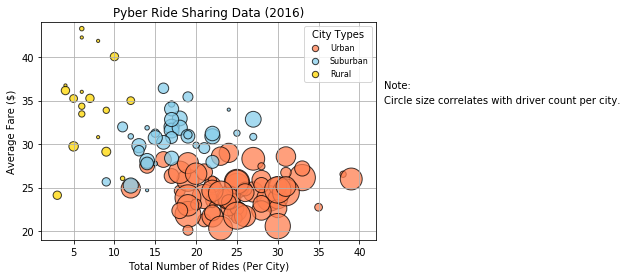

In [2]:
# Obtain the x and y coordinates for each of the three city types

#URBAN X and Y Coordinates
urban = combined_df.loc[combined_df['type'] == 'Urban', :]
urban_avg_fare = urban.groupby('city')['fare'].mean()
urban_y_axis = urban_avg_fare
urban_ride_count = urban.groupby('city')['ride_id'].count()
urban_x_axis = urban_ride_count

#URBAN Driver Count for Scatter Point Sizes
urban_driver = urban.groupby('city')['driver_count'].mean()

#SUBURBAN X and Y Coordinates
suburban = combined_df.loc[combined_df['type'] == 'Suburban', :]
suburban_avg_fare = suburban.groupby('city')['fare'].mean()
suburban_y_axis = suburban_avg_fare
suburban_ride_count = suburban.groupby('city')['ride_id'].count()
suburban_x_axis = suburban_ride_count

#SUBURBAN Driver Count for Scatter Point Sizes
suburban_driver = suburban.groupby('city')['driver_count'].mean()

#RURAL X and Y Coordinates
rural = combined_df.loc[combined_df['type'] == 'Rural', :]
rural_avg_fare = rural.groupby('city')['fare'].mean()
rural_y_axis = rural_avg_fare
rural_ride_count = rural.groupby('city')['ride_id'].count()
rural_x_axis = rural_ride_count

#RURAL Driver Count for Scatter Point Sizes
rural_driver = rural.groupby('city')['driver_count'].mean()


#URBAN Scatte Plot
urban_plot = plt.scatter(urban_x_axis, urban_y_axis, marker="o", facecolors="coral",
                         s=urban_driver*10, alpha=0.75, edgecolors="black", label="Urban")

#SUBURBAN Scatter Plot
suburban_plot = plt.scatter(suburban_x_axis, suburban_y_axis, marker="o", facecolors="skyblue",
                            s=suburban_driver*10, alpha=0.75, edgecolors="black", label="Suburban")

#RURAL Scatter Plot
rural_plot = plt.scatter(rural_x_axis, rural_y_axis, marker="o", facecolors="gold",
                         s=rural_driver*10, alpha=0.75, edgecolors="black", label="Rural")

#Scatter Plot Details and Aesthetics
plt.ylim(19, 44)
plt.xlim(1,42)
plt.grid()
legend = plt.legend(title='City Types',fontsize = 8)
legend.legendHandles[0]._sizes = [40]
legend.legendHandles[1]._sizes = [40]
legend.legendHandles[2]._sizes = [40]

#Scatter Plot Axis and Title Lables
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")

#Scatter Plot Text Box
txt="Note:"
txt2="Circle size correlates with driver count per city."
plt.figtext(0.92, 0.65, txt, horizontalalignment='left', fontsize=10)
plt.figtext(0.92, 0.6, txt2, horizontalalignment='left', fontsize=10)

# Save Figure
plt.savefig("../Images/pyber_ride_sharing_data_2016.png")


## Total Fares by City Type

Total Fares: $63538.64
---------------------
type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64
---------------------
Percent Urban Fares: 62.72463496228436
Percent Suburban Fares: 30.46387206273222
Percent Rural Fares: 6.811492974983412
---------------------


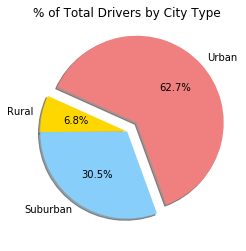

In [8]:
# Calculate Driver Percents
total_fare = combined_df['fare'].sum()
print(f"Total Fares: ${total_fare}")
print("---------------------")

fare_city = combined_df.groupby('type')['fare'].sum()
print(fare_city)
print("---------------------")

fare_urban = (39854.38/total_fare)*100
print(f"Percent Urban Fares: {fare_urban}")
fare_suburban = (19356.33/total_fare)*100
print(f"Percent Suburban Fares: {fare_suburban}")
fare_rural = (4327.93/total_fare)*100
print(f"Percent Rural Fares: {fare_rural}")
print("---------------------")

# Build Pie Chart
labels = ['Urban','Rural','Suburban']

values = [39854.38,4327.93,19356.33]

colors = ['lightcoral','gold','lightskyblue']

explode = (0.15, 0, 0)

plt.pie(values, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%",startangle=290, radius=1, shadow=True)

plt.title('% of Total Drivers by City Type')

# Save Figure
plt.savefig("../Images/fares_by_city.png")

## Total Rides by City Type

Total Rides: 2375
---------------------
Urban       1625
Suburban     625
Rural        125
Name: type, dtype: int64
---------------------
Percent Urban Rides: 68.42105263157895
Percent Suburban Rides: 26.31578947368421
Percent Rural Rides: 5.263157894736842
---------------------


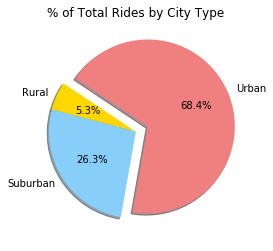

In [7]:
# Calculate Type Percents
total = combined_df['type'].count()
print(f"Total Rides: {total}")
print("---------------------")

print(combined_df['type'].value_counts())
print("---------------------")

per_urban = (1625/total)*100
print(f"Percent Urban Rides: {per_urban}")
per_suburban = (625/total)*100
print(f"Percent Suburban Rides: {per_suburban}")
per_rural = (125/total)*100
print(f"Percent Rural Rides: {per_rural}")
print("---------------------")

# Build Pie Chart
labels = ['Urban','Rural','Suburban']

values = [1625,125,625]

colors = ['lightcoral','gold','lightskyblue']

explode = (0.15, 0, 0)

plt.pie(values, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%",startangle=260, radius=1, shadow=True)

plt.title('% of Total Rides by City Type')


# Save Figure
plt.savefig("../Images/rides_by_city.png")

## Total Drivers by City Type

Total Drivers: 2973
---------------------
type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64
---------------------
Percent Urban Drivers: 80.89471913891691
Percent Suburban Drivers: 16.481668348469558
Percent Rural Drivers: 2.6236125126135215
---------------------


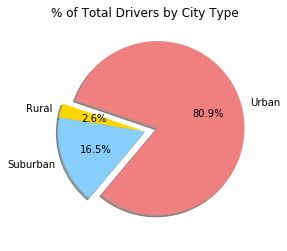

In [6]:
# Calculate Driver Percents
total_driver = combined_df[['city','driver_count','type']]

total_driver_df = total_driver.drop_duplicates(keep='first')

total_driver_group = total_driver_df.groupby('type')['driver_count'].sum()
total_driver_city = total_driver_group.sum()
print(f"Total Drivers: {total_driver_city}")
print("---------------------")
print(total_driver_group)

print("---------------------")

drive_urban = (2405/total_driver_city)*100
print(f"Percent Urban Drivers: {drive_urban}")
drive_suburban = (490/total_driver_city)*100
print(f"Percent Suburban Drivers: {drive_suburban}")
drive_rural = (78/total_driver_city)*100
print(f"Percent Rural Drivers: {drive_rural}")
print("---------------------")

# Build Pie Chart
labels = ['Urban','Rural','Suburban']

values = [2405,78,490]

colors = ['lightcoral','gold','lightskyblue']

explode = (0.15, 0, 0)

plt.pie(values, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%",startangle=230, radius=1, shadow=True)

plt.title('% of Total Drivers by City Type')

# Save Figure
plt.savefig("../Images/drivers_by_city.png")

In [ ]:
# The data from the bubble and pie charts show predictable trends.
# In general, there are more pyber drivers where higher population density is. 
# The most is in Urban, then Suburban, then rural. 
# Avg fares are more expensive in rural areas, presumably a combination of less drivers and going longer distances
# in comparison to urban dwellers who are likely going shorter distances and thus have cheaper rides.